### Closed form solution to the OLS problem with matrices and example python codes.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

%matplotlib inline

#### Generate some test data

In [4]:
# our true equation, I just made this up...
f_1 = lambda x: -0.5 * x + 20

# number of data points
num_vals = 20

# x values
x = np.linspace(-50, 50, num_vals)

# y vals with added in random noise
np.random.seed(23)
y = f_1(x) + np.random.normal(0, 10, num_vals)

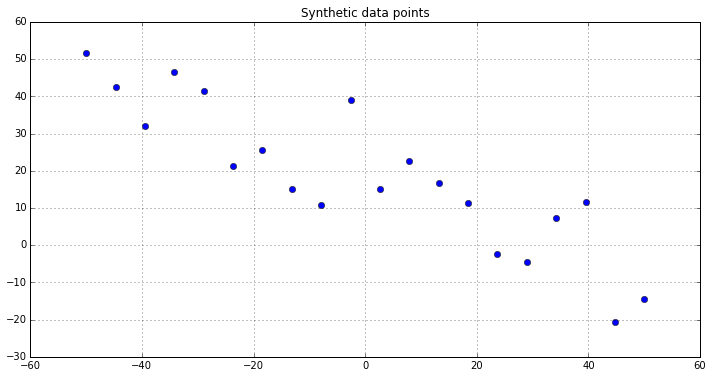

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(x, y, 'o')
plt.title('Synthetic data points')
plt.grid()
plt.show()

### A brief explanation of closed form OLS with matrices

**Mostly from the slides.**

$$Y = X\cdot{\theta} + e$$

Starting from the above which is similar in appearance to the familiar equation of a line ($y=m\cdot{x}+b$) except that:

* Y is a Nx1 vector of target values.
* X is a Nx(p+1) matrix of input values.
* $\theta$ is a (p+1) x 1 matrix of parameter values.


Given that the sum squared error can be expressed as:

$$SSE = e'e$$

We can re-write the SSE as:

$$SSE = (Y-X\theta)'(Y-X\theta)$$
$$=(Y' − \theta'X')(Y − X\theta)$$

Foil!

$$=Y'Y - Y'X\theta - \theta'X'Y +\theta'X'X\theta$$

The middle terms above are actually the same scaler (according to the internet) so they can be simplified as follows:



$$=Y'Y − 2\theta'X'Y + \theta'X'X\theta$$

Where:

$$\dfrac{∂SSE}{∂\theta}=\dfrac{∂}{∂\theta}(Y'Y − 2\theta'X'Y + \theta'X'X\theta)$$

Differentiating gives us:

$$\dfrac{∂SSE}{∂\theta}=-2X'Y + 2X'X\theta$$

Setting to 0:

$$0=-2X'Y + 2X'X\theta$$
$$\require{cancel} (X'X)^{-1}X'Y = \cancel{(X'X)^{-1}X'X}\theta$$

And finally...

$$(X'X)^{-1}X'Y = \theta$$

#### The numpy solution

one line...

In [6]:
ols = lambda x, y: np.linalg.inv(x.T.dot(x)).dot(x.T.dot(y))

#### Matrix augmentation

This is nescessary so X'X yields a square matrix. Recall that for a matrix A to be invertible there must be some matrix B such that $AB=BA=I_n$ which means that a condition for inversion is that A is nxn. 

With the data above X is a 20 element array. Without augmenting the matrices X'X gives us:

```python
x.T.dot(x)
18421.05263157895
```

If we augment the matrix with an additional column of ones:

```python
x_aug.T.dot(x_aug)
array([[  1.84210526e+04,   9.94759830e-14],
       [  9.94759830e-14,   2.00000000e+01]])
```

Which we can invert:

```python
np.linalg.inv(x_aug.T.dot(x_aug))
array([[  5.42857143e-05,  -2.70006240e-19],
       [ -2.70006240e-19,   5.00000000e-02]])
```

And then multiply by X'Y to get the slope and intercept.
```python
np.array([[  5.42857143e-05,  -2.70006240e-19], [ -2.70006240e-19,   5.00000000e-02]]).dot(x_aug.T.dot(y))
array([ -0.56399372,  18.45259465])
```

In [7]:
# add our column of ones to augment
x_aug = np.ones((num_vals, 2))
x_aug[:, 0] = x

In [8]:
x_aug

array([[-50.        ,   1.        ],
       [-44.73684211,   1.        ],
       [-39.47368421,   1.        ],
       [-34.21052632,   1.        ],
       [-28.94736842,   1.        ],
       [-23.68421053,   1.        ],
       [-18.42105263,   1.        ],
       [-13.15789474,   1.        ],
       [ -7.89473684,   1.        ],
       [ -2.63157895,   1.        ],
       [  2.63157895,   1.        ],
       [  7.89473684,   1.        ],
       [ 13.15789474,   1.        ],
       [ 18.42105263,   1.        ],
       [ 23.68421053,   1.        ],
       [ 28.94736842,   1.        ],
       [ 34.21052632,   1.        ],
       [ 39.47368421,   1.        ],
       [ 44.73684211,   1.        ],
       [ 50.        ,   1.        ]])

#### Testing it out

In [9]:
# test against the sklearn implementation

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
# sklearn needs a nx1 numpy.ndarrays
# so we reshape to add

regr.fit(np.reshape(x, (num_vals, 1)), np.reshape(y, (num_vals, 1)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

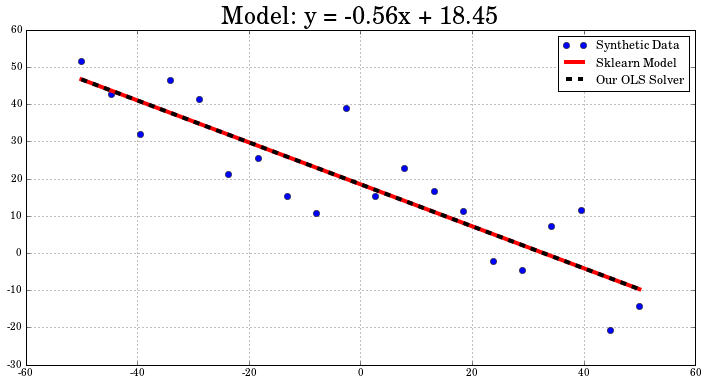

In [10]:
# call out function to get the slope and intercept
m, b = ols(x_aug, y)

plt.figure(figsize=(12, 6))

# synthetic data points
plt.plot(x, y, 'o', label='Synthetic Data')

# again, sklearn needs a nx1 array
plt.plot(x, regr.predict(np.reshape(x, (num_vals, 1))), color='red', linewidth=4, label='Sklearn Model')

# our ols solver
plt.plot(x, m*x + b, '--k', linewidth=4, label='Our OLS Solver')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

title = r'Model: y = %.2fx + %.2f' % (m, b)
plt.title(title, fontsize=24)
plt.legend()
plt.grid()
plt.show()

In [11]:
# Comparing coefficients between sklearn and ours.
print m,b,'\n',regr.coef_, regr.intercept_[0]

-0.563993716391 18.4525946507 
[[-0.56399372]] 18.4525946507


### Higher degree polynomials

Higher degree polynomial fitting requires a slightly different X.

This is nicely explained here:

http://mathworld.wolfram.com/LeastSquaresFittingPolynomial.html

In [12]:
# our true equation, I just made this up...
f_2 = lambda x: x**2 - 0.5 * x

# number of data points
num_vals = 20

# x values
x = np.linspace(-5, 5, num_vals)

# y vals with added in random noise
np.random.seed(23)
y = f_2(x) + np.random.normal(0, 3, num_vals)

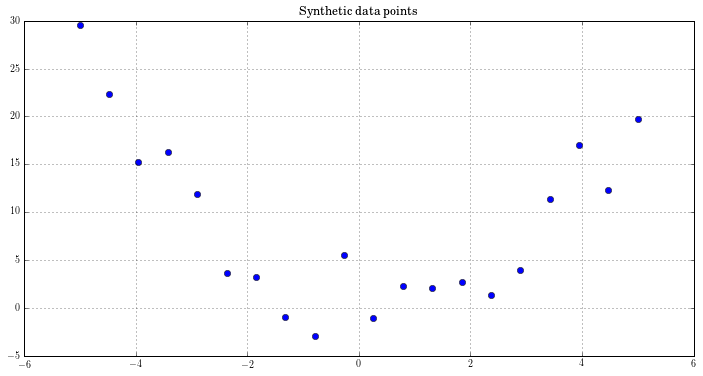

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(x, y, 'o')
plt.title('Synthetic data points')
plt.grid()
plt.show()

In [14]:
def polyfit(x, y, degree=1):
    """
    Find polynomial coefficients given x and y. 
    """
    # We are assuming that X and Y are vectors
    # x.shape = (n,)
    m, = x.shape
    
    # Generate polynomial features.
    # we need the first column to be ones, the second to be x**1
    # the third to be x**2, ..., x**order
    x_aug = np.power(x.repeat(degree+1).reshape((m, degree+1)), xrange(degree+1))
    
    # this is the same as above (X'X)^-1(X'Y)
    return np.linalg.inv(x_aug.T.dot(x_aug)).dot(x_aug.T.dot(y))

#### Our true equation:
$$y=x^2 - 0.5 x + 0$$

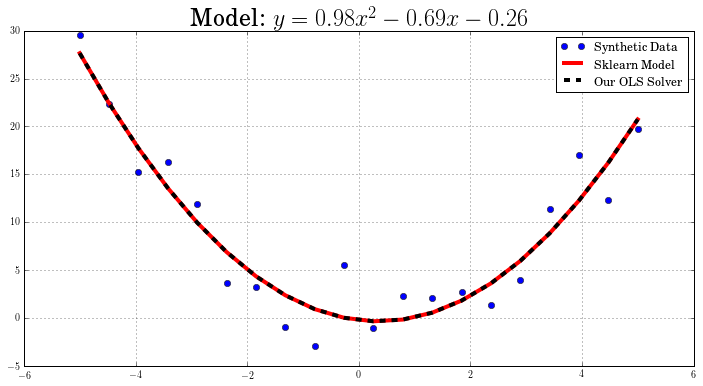

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Use sklearn to find the model
degree = 2
model = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())
model.fit(np.reshape(x, (num_vals, 1)), np.reshape(y, (num_vals, 1)))
y_plot = model.predict(np.reshape(x, (num_vals, 1)))

# Synthetic data
plt.figure(figsize=(12, 6))
plt.plot(x, y, 'o', label='Synthetic Data')

# again, sklearn needs a nx1 array
plt.plot(x, y_plot, color='red', linewidth=4, label='Sklearn Model')

# our ols solver
c,b,a = polyfit(x, y, 2)
plt.plot(x, a*x**2 + b*x + c, '--k', linewidth=4, label='Our OLS Solver')

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
title = r'Model: $y = %.2f {x^2} %.2fx %.2f$' % (a, b, c)
plt.title(title, fontsize=24)

plt.legend()
plt.grid()
plt.show()

#### Comparing coefficients

In [16]:
# from ours
polyfit(x, y, 2)

array([-0.26099313, -0.69198115,  0.97793519])

In [17]:
# from sklearn
l = model.steps[1][1]
l.intercept_, l.coef_[0][1:]

(array([-0.26099313]), array([-0.69198115,  0.97793519]))